In [97]:
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms import community
import community as community_louvain

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import pathlib

## Politifact

In [31]:
G = nx.readwrite.edgelist.read_edgelist('user_article.bigraph')

In [32]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 49243
Number of edges: 54483
Average degree:   2.2128


In [33]:
G = nx.readwrite.edgelist.read_edgelist('user_article_raw.bigraph')

In [35]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 49389
Number of edges: 54484
Average degree:   2.2063


In [124]:
user_articles = []
d = {}
with open('user_article_raw.bigraph', 'r') as f:
    lines = f.readlines()
    for line in lines:
        article, user = line.split()
        if article not in d:
            d[article] = set()
        d[article].add(user)

In [125]:
edgelist = []

for i, a1 in enumerate(d.keys()):
    for j, a2 in enumerate(d.keys()):
        if i < j:
            if len(d[a1].intersection(d[a2])) > 0:
                edgelist.append((a1, a2))

In [126]:
G2 = nx.Graph()
G2.add_edges_from(edgelist)

In [130]:
data_dir = pathlib.Path('../small_dataset/politifact')

label_dic = {}

for label in ['real', 'fake']:
    label_dir = data_dir / label
    for a in os.listdir(label_dir):
        if label == 'real':
            label_dic[a] = 0
        else:
            label_dic[a] = 1

In [134]:
label_dic_filtered = {a: label for a, label in label_dic.items() if a in partition.keys()}

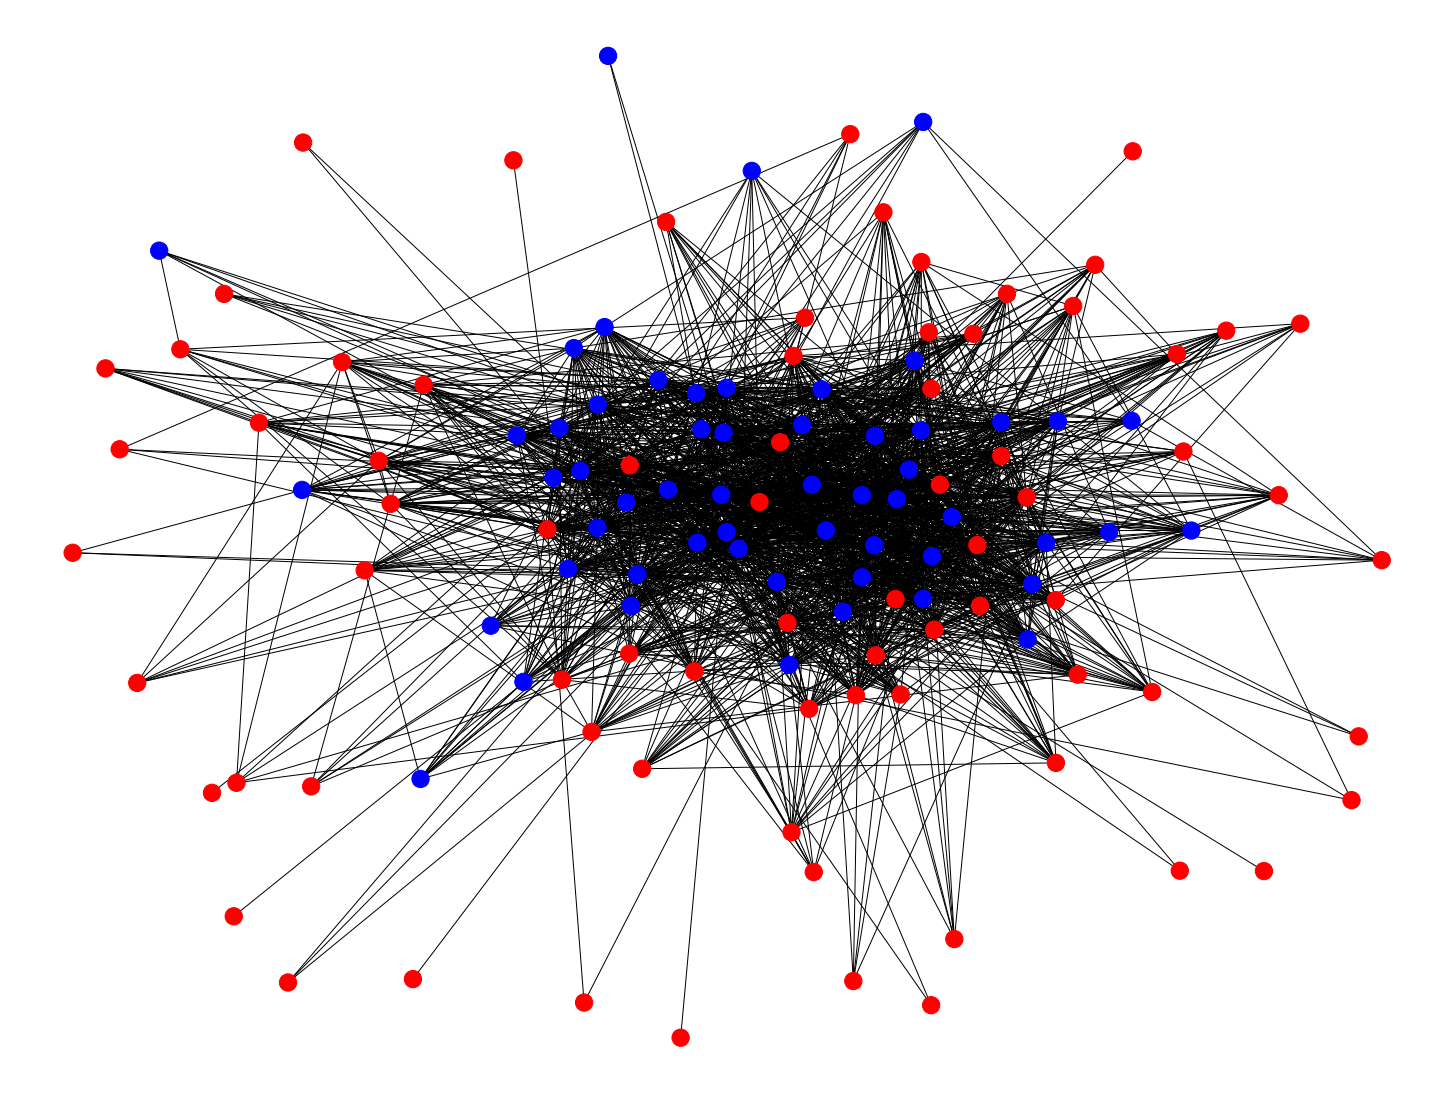

In [143]:
fig = plt.figure(figsize=(20,15))
cmap = cm.get_cmap('bwr', max(label_dic_filtered.values()) + 1)
nx.draw(G=G2, pos=nx.spring_layout(G2, k=1),
                       cmap=cmap, node_color=list(label_dic_filtered.values()))
fig.savefig('article_graph');

In [154]:
fake_nodes = [node for node in G2.nodes() if label_dic[node] == 1]
fakeG = G2.subgraph(fake_nodes)

real_nodes = [node for node in G2.nodes() if label_dic[node] == 0]
realG = G2.subgraph(real_nodes)

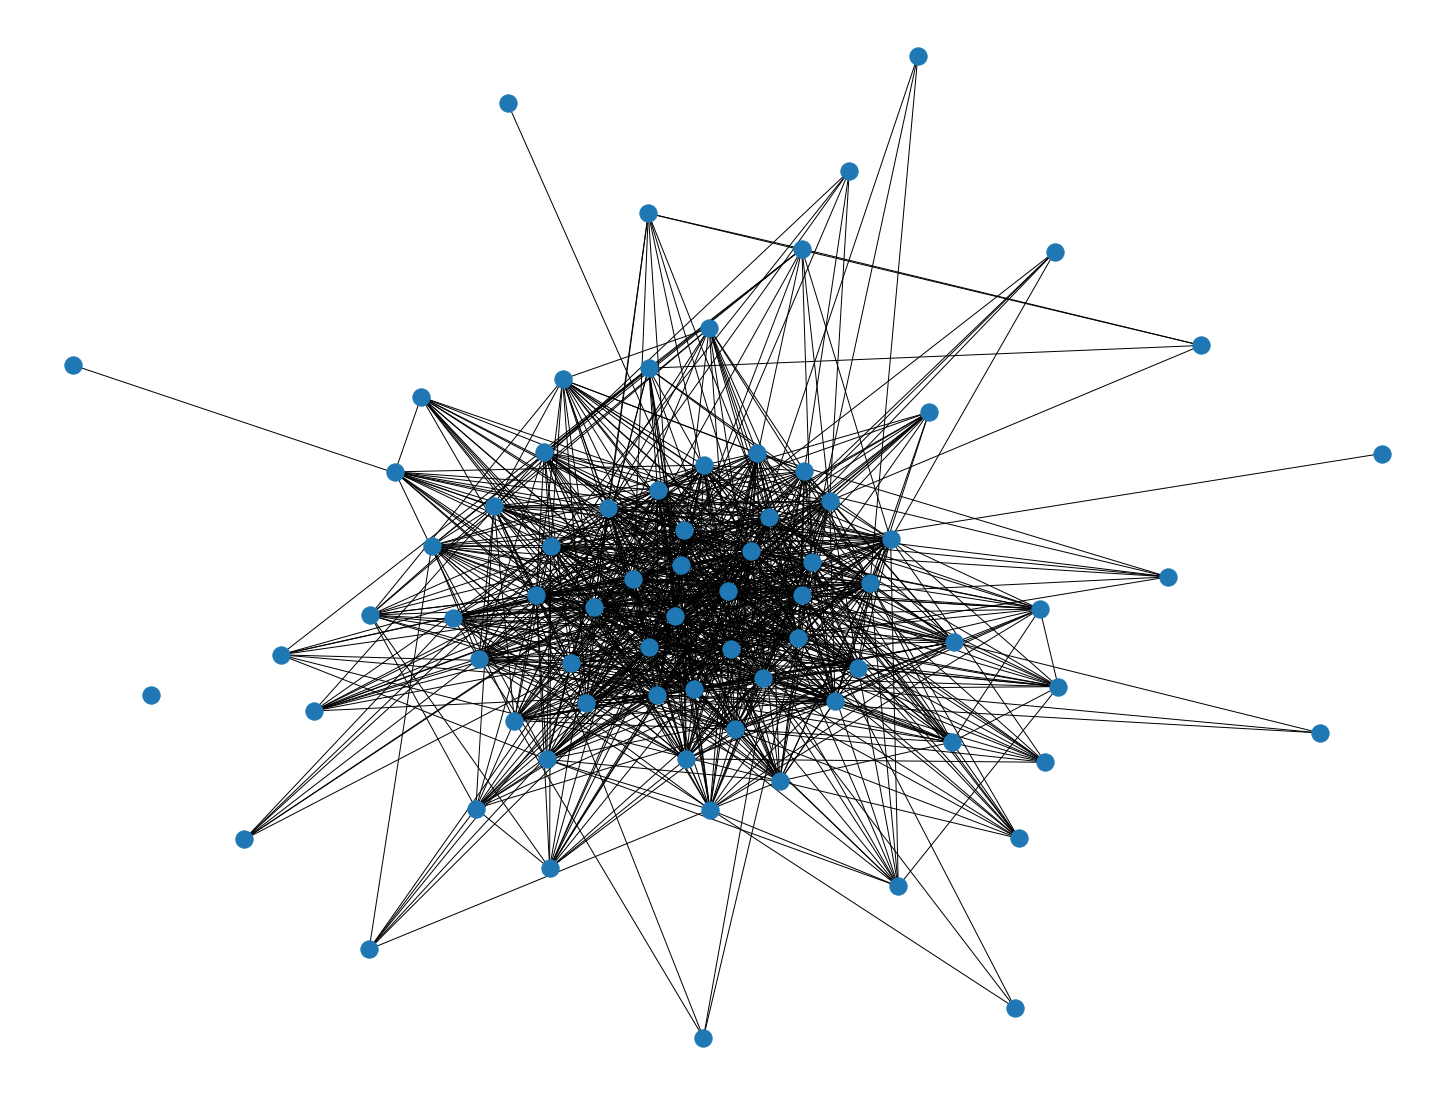

In [152]:
fig = plt.figure(figsize=(20,15))
nx.draw(G=fakeG, pos=nx.spring_layout(fakeG, k=1))

In [153]:
print(nx.info(fakeG))

Name: 
Type: Graph
Number of nodes: 75
Number of edges: 963
Average degree:  25.6800


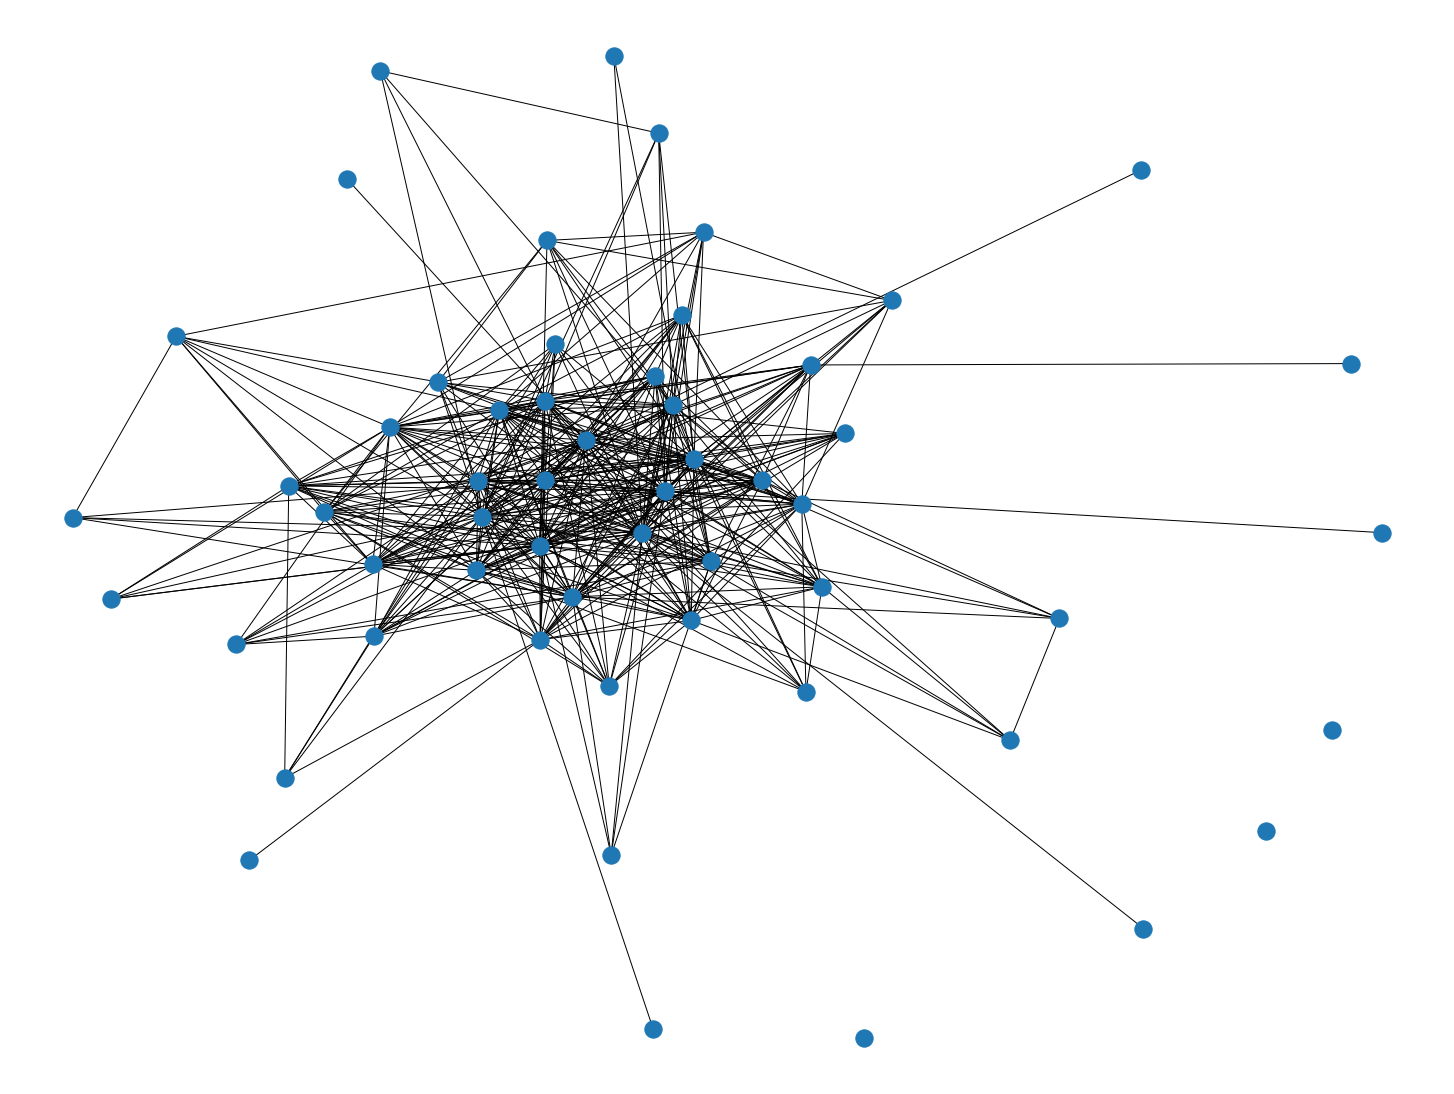

In [155]:
fig = plt.figure(figsize=(20,15))
nx.draw(G=realG, pos=nx.spring_layout(realG, k=1))

In [156]:
print(nx.info(realG))

Name: 
Type: Graph
Number of nodes: 56
Number of edges: 422
Average degree:  15.0714


In [170]:
fake_deg, real_deg = 0, 0

for node, deg in G2.degree(fake_nodes):
    fake_deg += deg

for node, deg in G2.degree(real_nodes):
    real_deg += deg

In [171]:
print(fake_deg / len(fake_nodes), real_deg / len(real_nodes))

34.10666666666667 26.357142857142858


## Gossipcop

In [177]:
G = nx.readwrite.edgelist.read_edgelist('user_article_raw_gossipcop.bigraph')


In [178]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8325
Number of edges: 11512
Average degree:   2.7656


In [179]:
user_articles = []
d = {}

with open('user_article_raw_gossipcop.bigraph', 'r') as f:
    lines = f.readlines()
    for line in lines:
        article, user = line.split()
        if article not in d:
            d[article] = set()
        d[article].add(user)

edgelist = []

for i, a1 in enumerate(d.keys()):
    for j, a2 in enumerate(d.keys()):
        if i < j:
            if len(d[a1].intersection(d[a2])) > 0:
                edgelist.append((a1, a2))

In [180]:
G2 = nx.Graph()
G2.add_edges_from(edgelist)

In [184]:
data_dir = pathlib.Path('../small_dataset/gossipcop')

label_dic = {}

for label in ['real', 'fake']:
    label_dir = data_dir / label
    for a in os.listdir(label_dir):
        if label == 'real':
            label_dic[a] = 0
        else:
            label_dic[a] = 1

In [187]:
label_dic_filtered = {a: label for a, label in label_dic.items() if a in G2.nodes()}

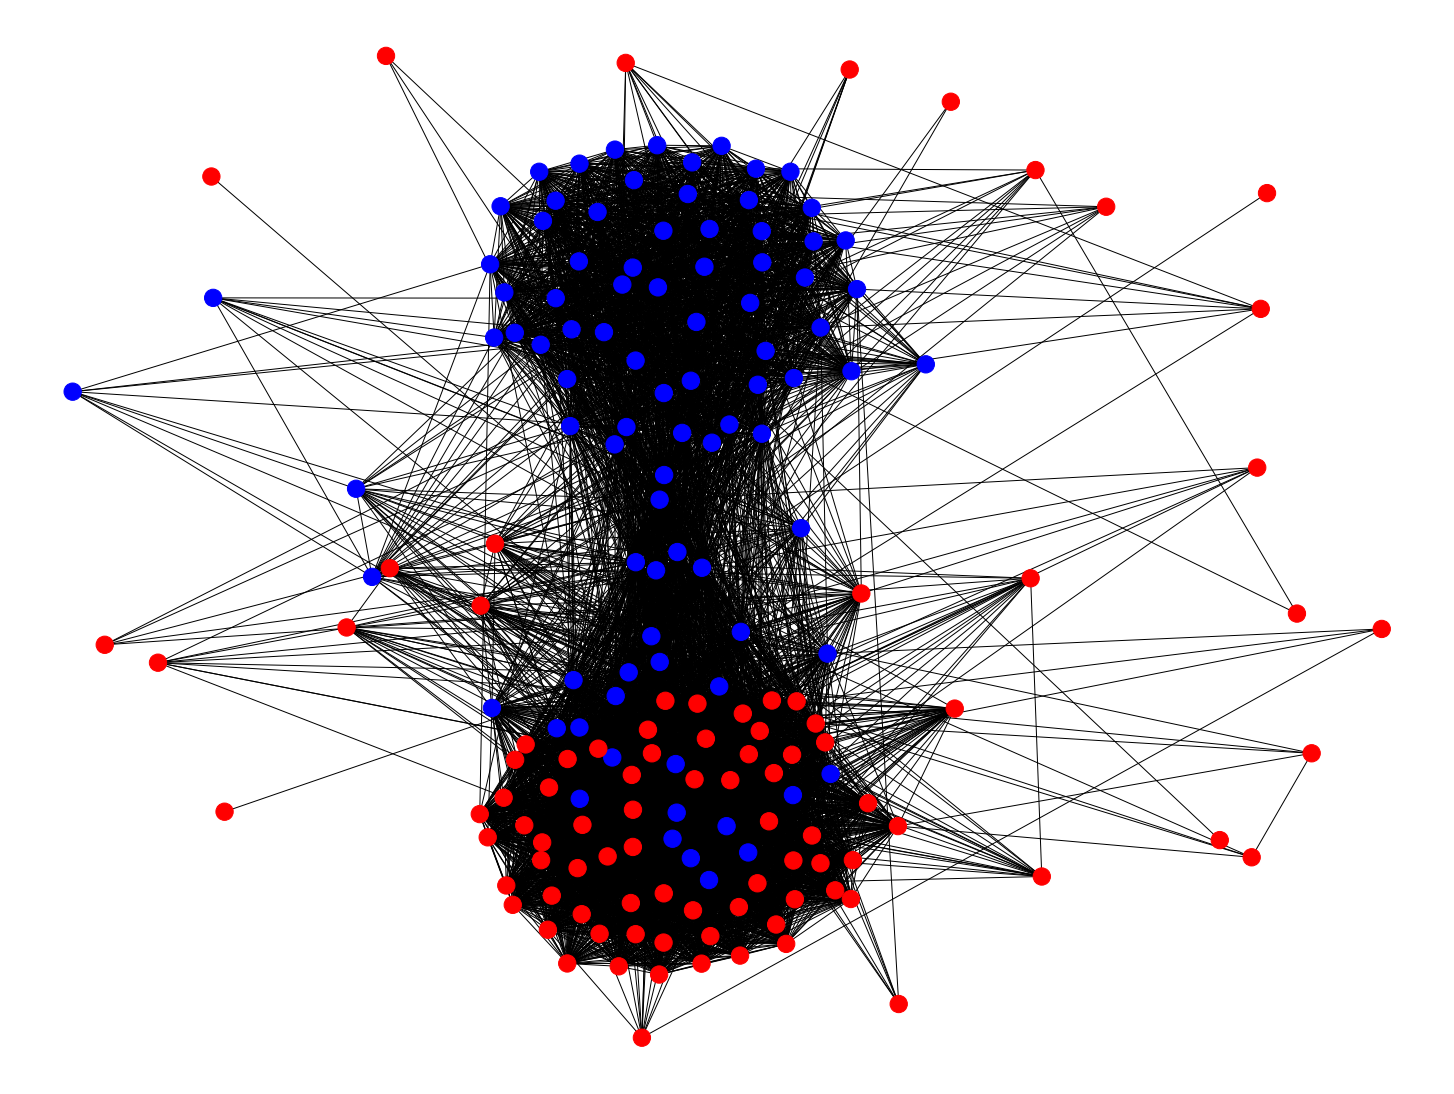

In [189]:
fig = plt.figure(figsize=(20,15))
cmap = cm.get_cmap('bwr', max(label_dic_filtered.values()) + 1)
nx.draw(G=G2, pos=nx.spring_layout(G2, k=1),
                       cmap=cmap, node_color=list(label_dic_filtered.values()))
fig.savefig('article_graph_gossipcop');

In [205]:
p1, p2 = community.kernighan_lin_bisection(G2)
bisection_label = {}
real_labels = {}

for node in p1:
    bisection_label[node] = 0

for node in p2:
    bisection_label[node] = 1

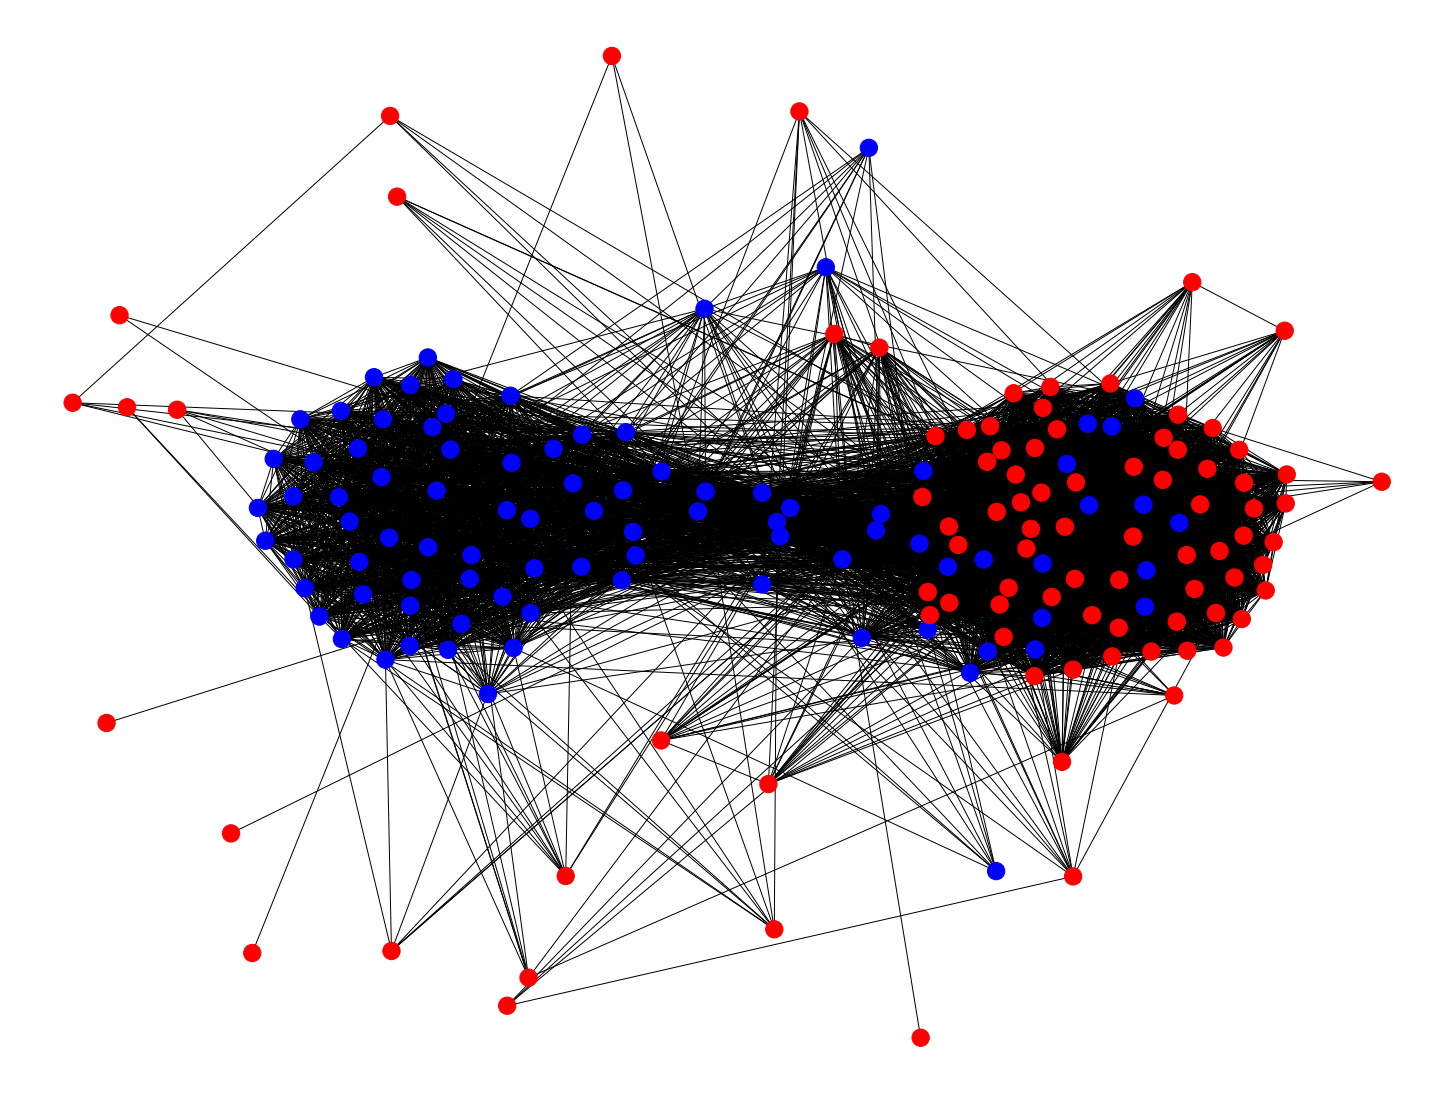

In [206]:
fig = plt.figure(figsize=(20,15))
cmap = cm.get_cmap('bwr', max(bisection_label.values()) + 1)
nx.draw(G=G2, pos=nx.spring_layout(G2, k=1),
                       cmap=cmap, node_color=list(bisection_label.values()))
# fig.savefig('article_graph_gossipcop');

In [207]:
np.mean([label_dic_filtered[node] == bisection_label[node] for node in G2.nodes()])

0.36464088397790057